In [1]:
import joblib
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np

model=joblib.load('brain_tumor_KMeans_mode.sav')
tumorLabel=5

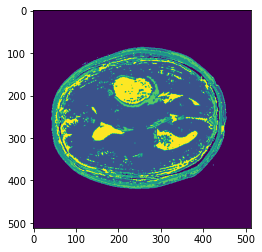

In [13]:
imagePath='test_images/0 (239).jpg'

img_original=cv2.imread(imagePath)
img=cv2.imread(imagePath,0)
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)
mask=(labels2D==tumorLabel)
plt.imshow(labels2D)  

      

In [9]:
import numpy as np
array1=np.array([2,547,5,7,87,5,34,2345,4,3,5,4,5])
array2=(array1==5)
print(array2)

[False False  True False False  True False False False False  True False
  True]


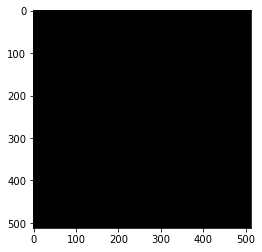

In [10]:
tumorExtracted=np.bitwise_and(mask,img)


plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [14]:
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no of contours:',len(contours))
cv2.drawContours(img_original,contours,1,(0,255,255),2)
for index,cnt in enumerate(contours):
    area=cv2.contourArea(cnt)
    print(area,index)
    
    
cv2.imshow('LIVE',img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

no of contours: 0


In [ ]:

test_img_path='test_images'
test_img_names=os.listdir(test_img_path)

for test_img_name in test_img_names:
    
    img_path=os.path.join(test_img_path,test_img_name)
    img=cv2.imread(img_path,0)
    height,width=img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)